In [421]:
import numpy as np
from random import seed
from random import random
from math import exp
import matplotlib.pyplot as plt
import math

def TextToArray(fileName):
    f_array=[]
    f = open(fileName, 'r+')
    lines = np.array([line for line in f.readlines()])
    for line in lines:
        line=line.replace('  ',',')
        for i in range(len(line)):
            if line[i]==',':
                first=float(line[:i])
                second=float(line[i+1:])
                f_array.append([first,second])
    return np.array(f_array)

Train1_f=TextToArray('Train1.txt')
Train2_f=TextToArray('Train2.txt')
Test1_f=TextToArray('Test1.txt')
Test2_f=TextToArray('Test2.txt')

#split train and validation
class1_train=Train1_f[0:1500]
class2_train=Train2_f[0:1500]
class1_val=Train1_f[1500:2000]
class2_val=Train2_f[1500:2000]

def mean_std(VecArray):
    mean = np.mean(VecArray, axis=0)
    std = np.std(VecArray, axis=0)
    result=np.vstack((mean,std))
    return result

def normalize(x,mean,std):
    return (x-mean)/std

class1_train_ms=mean_std(class1_train)
class2_train_ms=mean_std(class2_train)

def updateVec(train_vec,train_vec_ms):
    for i in range(train_vec.shape[1]):
        for j in range(train_vec.shape[0]):
            mean=train_vec_ms[:,i][0]
            std=train_vec_ms[:,i][1]
            train_vec[:,i][j]=normalize(train_vec[:,i][j],mean,std)
    return train_vec

#normalize training data
norm_class1_train=updateVec(class1_train,class1_train_ms)
norm_class2_train=updateVec(class2_train,class2_train_ms)

#normalize validation data
norm_class1_val=updateVec(class1_val,class1_train_ms)
norm_class2_val=updateVec(class2_val,class2_train_ms)

#normalize testing data
norm_class1_test=updateVec(Test1_f,class1_train_ms)
norm_class2_test=updateVec(Test2_f,class2_train_ms)

# #combine all train, val, test dataset
# train_all=np.vstack((norm_class1_train,norm_class2_train))
# val_all=np.vstack((norm_class1_val,norm_class2_val))
# test_all=np.vstack((norm_class1_test,norm_class2_test))

# #Zero label as class1, One label as class2 

# #Assign label and combine normalized train data
# train_label0=np.zeros((1500,1), dtype = int)
# train_label1=np.ones((1500,1), dtype = int)

# #Assign label and combine normalized val data
# val_label0=np.zeros((500,1), dtype = int)
# val_label1=np.ones((500,1), dtype = int)

# #Assign label and combine normalized test data
# test_label0=np.zeros((1000,1), dtype = int)
# test_label1=np.ones((1000,1), dtype = int)


# #set up labels for train, val, test set.
# train_labels=np.vstack((train_label0,train_label1))
# val_labels=np.vstack((val_label0,val_label1))
# test_labels=np.vstack((test_label0,test_label1))



# #combine features with labels in train, val, test.
# train_data=np.hstack((train_all,train_labels))
# val_data=np.hstack((val_all,val_labels))
# test_data=np.hstack((test_all,test_labels))

In [422]:
# egin to design MLP network
class relu():
    def __init__(self):
        pass

    def forward(self, input):
        return np.maximum(0, input)

    def backward(self, input, loss_output_grad):
        output_input_grad = input > 0
        return loss_output_grad * output_input_grad

In [423]:
# build a mlp_unit 
class MLP_unit():
    def __init__(self, input_units, output_units, learning_rate=0.001):
        self.learning_rate = learning_rate
        limit   = 1 / math.sqrt(input_units)
        self.weights  = np.random.uniform(-limit, limit, (input_units, output_units))
        self.biases = np.zeros(output_units)

    def forward(self, input):
        return np.dot(input, self.weights) + self.biases

    def backward(self, input, loss_output_grad):
        loss_input_grad = np.dot(loss_output_grad, self.weights.T)
        loss_weights_grad = np.dot(input.T, loss_output_grad)
        loss_biases_grad = loss_output_grad.mean(axis=0) * input.shape[0]

        self.weights = self.weights - self.learning_rate * loss_weights_grad
        self.biases = self.biases - self.learning_rate * loss_biases_grad

        return loss_input_grad

In [424]:
def pass_to_forward(network, input):
    layer_activations = []
    for layer in network:
        layer_activations.append(layer.forward(input))
        input = layer_activations[-1]
    return layer_activations

In [425]:
def predict(network, data):
    logits = pass_to_forward(network, data)[-1]
    return logits >= 0.5

In [426]:
def compute_accuracy(network, data, targets):
    return np.mean(predict(network, data).T.squeeze() == targets)

In [427]:
def training(network, data, targets, is_train=True):
    layer_activations = pass_to_forward(network, data)
    layer_inputs = [data] + layer_activations
    logits = layer_activations[-1]
    MSE_loss = np.mean(np.square(logits.T.squeeze() - targets))
    if is_train:
        loss_output_grad = logits - np.array([targets]).T  # loss_logits_grad
        for layer_idx in range(len(network))[::-1]:
            layer = network[layer_idx]
            loss_output_grad = layer.backward(layer_inputs[layer_idx], loss_output_grad)
    return MSE_loss

In [428]:
# we implement mini batch training
def get_batches(data, targets, batch_size):
    indices = np.random.permutation(len(data))
    for start_idx in range(0, len(data)-batch_size+1, batch_size):
        batch_indices = indices[start_idx:start_idx+batch_size]
        yield data[batch_indices], targets[batch_indices]

In [429]:
# we try 5 differen hidden unit 
hidden_num = [2, 4, 6, 8, 10]
batch_size = 256

Test acc with hidden units 2 is 0.611.
Test acc with hidden units 4 is 0.669.
Test acc with hidden units 6 is 0.706.
Test acc with hidden units 8 is 0.7085.
Test acc with hidden units 10 is 0.7085.


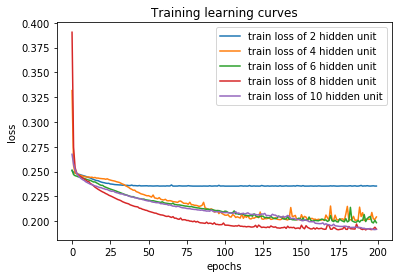

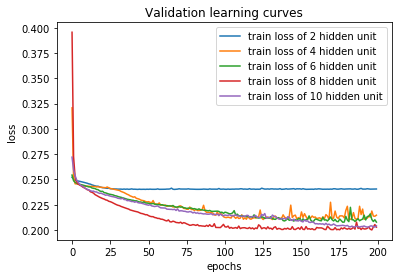

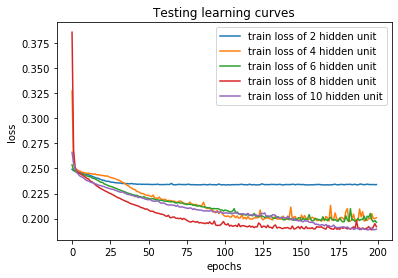

In [431]:
def plotFigure(data_plot,file_name,order):
    fig = plt.figure(order, figsize=(9, 6))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_plot)
    fig.savefig(file_name, bbox_inches='tight')
    plt.close()

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

for hidden_units in hidden_num:
    network = []
    network.append(MLP_unit(norm_class1_train.shape[1], hidden_units))
    network.append(relu())
    network.append(MLP_unit(hidden_units, 1))
    network.append(relu())
    train_plot = []
    val_plot = []
    test_plot = []
    prev_val_loss = 1000000
    epochs = 0
    # plot the result
    for _ in range(200):
        
        epochs += 1
        for data_batch, target_batch in get_batches(np.vstack((norm_class1_train, norm_class2_train)), np.array([0.0] * len(norm_class1_train) + [1.0] * len(norm_class2_train)), batch_size):
            training(network, data_batch, target_batch, is_train=True)

        train_loss = training(network, np.vstack((norm_class1_train, norm_class2_train)), np.array([0.0] * len(norm_class1_train) + [1.0] * len(norm_class2_train)), is_train=False)
        test_loss = training(network, np.vstack((norm_class1_test, norm_class2_test)), np.array([0.0] * len(norm_class1_test) + [1.0] * len(norm_class2_test)), is_train=False)
        val_loss = training(network, np.vstack((norm_class1_val, norm_class2_val)), np.array([0.0] * len(norm_class1_val) + [1.0] * len(norm_class2_val)), is_train=False)
        train_plot.append(train_loss)
        test_plot.append(test_loss)
        val_plot.append(val_loss)

        if val_loss >= prev_val_loss:
            pass
        else:
            prev_val_loss = val_loss
    
    ax1.plot([i for i in range(len(train_plot))], 
             train_plot, 
             label= f'train loss of {hidden_units} hidden unit' )
    ax1.set_title("Training learning curves")
    ax1.set_xlabel("epochs")
    ax1.set_ylabel("loss")
    ax1.legend()

    ax2.plot([i for i in range(len(train_plot))], 
             val_plot, 
             label= f'train loss of {hidden_units} hidden unit' )
    ax2.set_title("Validation learning curves")
    ax2.set_xlabel("epochs")
    ax2.set_ylabel("loss")
    ax2.legend()

    ax3.plot([i for i in range(len(train_plot))], 
             test_plot, 
             label= f'train loss of {hidden_units} hidden unit' )
    ax3.set_title("Testing learning curves")
    ax3.set_xlabel("epochs")
    ax3.set_ylabel("loss")
    ax3.legend()

    test_accuracy = compute_accuracy(network, np.vstack((norm_class1_test, norm_class2_test)), np.array([0.0] * len(norm_class1_test) + [1.0] * len(norm_class2_test)))
    print(f"Test acc with hidden units {hidden_units} is {test_accuracy}.")

In [432]:
[i for i in range(len(train_plot))]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
